<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/29.%20Forecasting_Equation_based_models_27_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

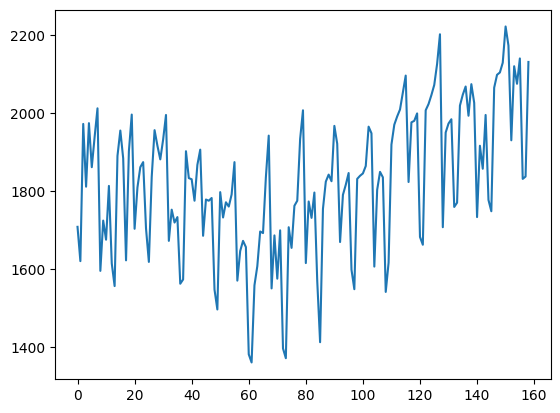

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [3]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y") # extracting the date
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using
# Date functions from pandas

Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction
# The above extractions are done to form a pivot table for the heat map

<Axes: xlabel='month', ylabel='year'>

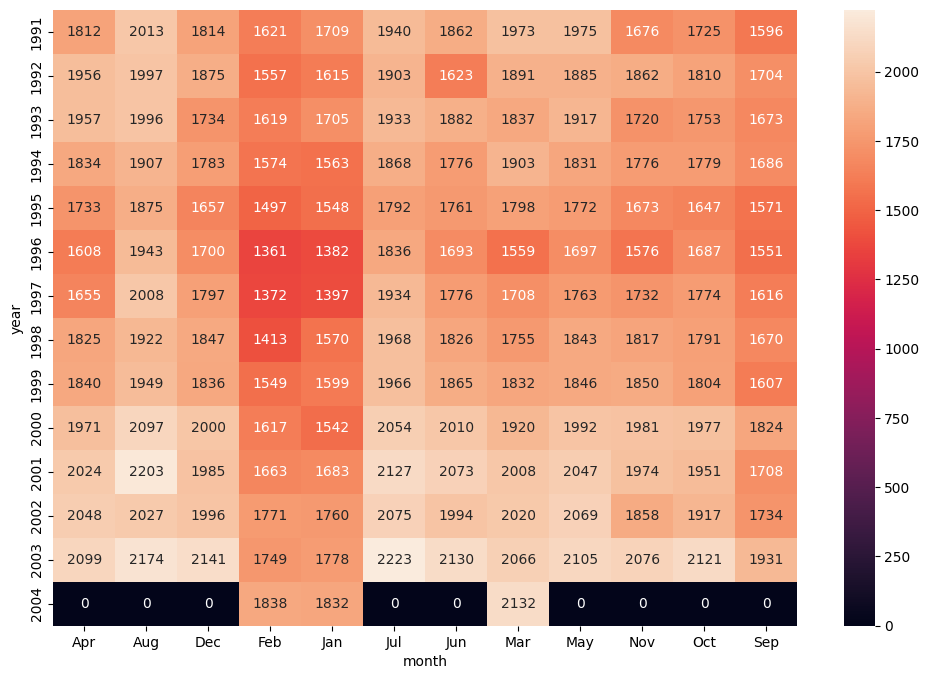

In [5]:
# Creating a heatmap to understand the amount of footfall per month
plt.figure(figsize=(12,8))
# we creat a pivot table where the data is Walmart
# values = Footfalls column
# index = year
# columns = month
# aggfunc = mean
# fill_value = 0
heatmap_y_month = pd.pivot_table(data=Walmart,values="Footfalls",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


In [6]:
# We can see that there are less customers in the month of Jan, Feb and September

<Axes: xlabel='year', ylabel='Footfalls'>

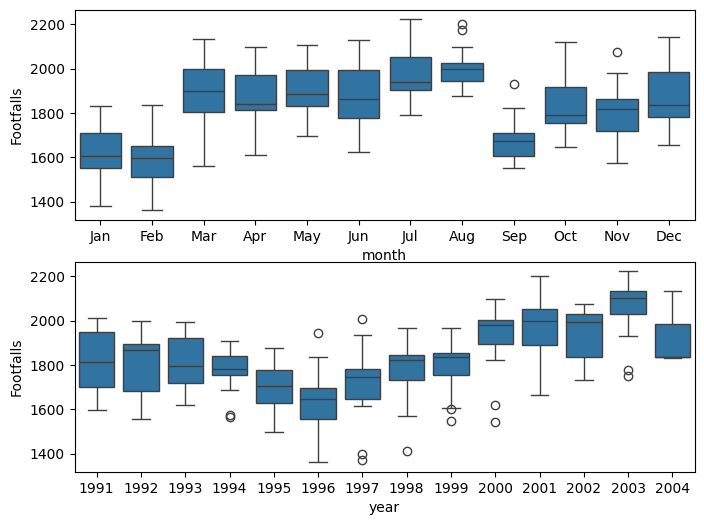

In [7]:
# Similarly we can get that above information from a box plot
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=Walmart)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=Walmart)


<Axes: xlabel='year', ylabel='Footfalls'>

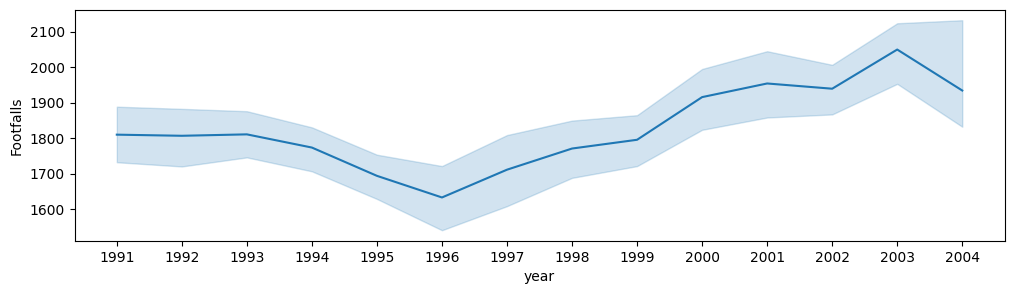

In [8]:
# Line plot to visualize the above trend
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=Walmart)

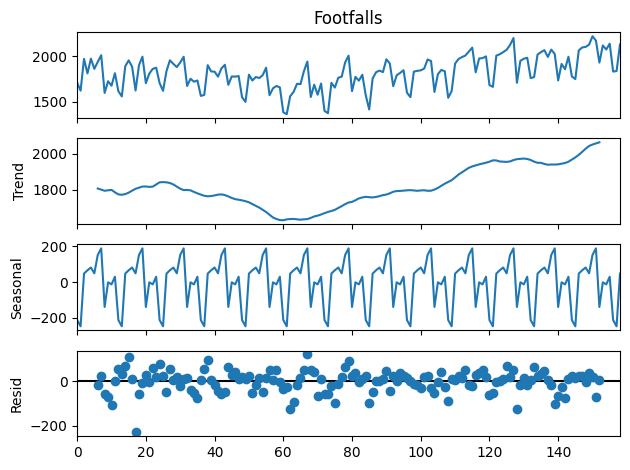

In [9]:
# If we want to break the data into - trend, seasonality and error
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# Splitting data

In [10]:
# Splitting the data into training and testing
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [20]:
#Linear Model
import statsmodels.formula.api as smf # linear regression
# Ordinary least square method
linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [21]:
#Exponential
# Lof of footfalls against time
Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


217.05263569546594

In [22]:
#Quadratic
# We are regressing footfall against t and t square
Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356146

In [23]:
#Additive seasonality
# Regressing the footfall against the dummy variables for every month on month
# Fitting it on the data and making predictions and finding out the RMSE
add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.6643900568774

In [24]:
#Additive Seasonality Quadratic
# Combining quadratic model with additive seasonality model
add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.607245841424444

In [25]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266231

In [26]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

172.76726787489721

In [27]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


In [28]:
# The best model is quadratic model plus additive seasonality

#### Predict for new time period

In [29]:
# Using another dataset, using the previously trained model and applying onn the dataset
predict_data = pd.read_csv("Predict_new (2).csv")

In [30]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [31]:
#Build the model on entire data set
# We have trained the quadratic model on the entire dataset
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Walmart).fit()

In [32]:
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

,0
0,2193.807626
1,2229.969736
2,2200.670308
3,2311.293957
4,2356.071452
5,2036.848947
6,2187.241826
7,2181.480859
8,2234.104508
9,1999.997498


In [33]:
# All the predicted values can be stored in a new column
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [34]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2193.807626
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2229.969736
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2200.670308
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2311.293957
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2356.071452
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2036.848947
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2187.241826
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2181.480859
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2234.104508
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,1999.997498
